In [3]:
import pandas as pd
import numpy as np

dt=pd.read_csv('/content/data.csv', encoding='latin1', low_memory=False)
x=dt["no2"].dropna().values

In [4]:
r=102317119
a_r=0.5*(r%7)
b_r=0.3*((r%5)+1)
print("a_r =",a_r)
print("b_r=",b_r)
z=x+a_r*np.sin(b_r*x)


a_r = 1.0
b_r= 1.5


## step 2

In [5]:
z=z.reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))
z_scaled = scaler.fit_transform(z)

In [6]:
pip install tensorflow.Keras

In [7]:
import tensorflow as tf
from tensorflow.keras import layers
def build_generator():
  model = tf.keras.Sequential([
    layers.Dense(32,activation="relu",input_dim=1),
    layers.Dense(64,activation="relu"),
    layers.Dense(1)
  ])
  return model

In [8]:
def build_discriminator():
  model=tf.keras.Sequential([
      layers.Dense(64,activation="relu",input_dim=1),
      layers.Dense(32,activation="relu"),
      layers.Dense(1,activation="sigmoid")
  ])
  model.compile(
      loss="binary_crossentropy",
      optimizer=tf.keras.optimizers.Adam(0.0002),
      metrics=["accuracy"]
  )
  return model

GAN model

In [9]:
generator= build_generator()
discriminator=build_discriminator()

discriminator.trainable = False
gan_input =layers.Input(shape=(1,))
fake_sample = generator(gan_input)
gan_output=discriminator(fake_sample)
gan=tf.keras.Model(gan_input,gan_output)
gan.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(0.0002)
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
epochs=3000
batch_size=32

for epoch in range(epochs):
  idx=np.random.randint(0,z_scaled.shape[0],batch_size)
  real_sample=z_scaled[idx]
  noise=np.random.normal(0,1,(batch_size,1))
  fake_sample=generator.predict(noise,verbose=0)
  d_loss_real=discriminator.train_on_batch(real_sample,np.ones((batch_size,1)))
  d_loss_fake=discriminator.train_on_batch(fake_sample,np.zeros((batch_size,1)))

  noise =np.random.normal(0,1,(batch_size,1))
  g_loss=gan.train_on_batch(noise,np.ones((batch_size,1)))

  if epochs %500==0:
    print(f"epochs {epochs},D loss: {0.5*(d_loss_real[0]+d_loss_fake[0])},G Loss:{g_loss}")

/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


epochs 3000,D loss: 0.7371593117713928,G Loss:0.6944786310195923
epochs 3000,D loss: 0.727033257484436,G Loss:0.6945362091064453
epochs 3000,D loss: 0.7248507738113403,G Loss:0.6944414973258972
epochs 3000,D loss: 0.7242100834846497,G Loss:0.6944337487220764
epochs 3000,D loss: 0.7237069606781006,G Loss:0.6944173574447632
epochs 3000,D loss: 0.723400890827179,G Loss:0.6943730711936951
epochs 3000,D loss: 0.7232329845428467,G Loss:0.6942964196205139
epochs 3000,D loss: 0.7231035232543945,G Loss:0.694258451461792
epochs 3000,D loss: 0.722946047782898,G Loss:0.6942036151885986
epochs 3000,D loss: 0.7228915691375732,G Loss:0.6941678524017334
epochs 3000,D loss: 0.7228490114212036,G Loss:0.6941614747047424
epochs 3000,D loss: 0.7227823734283447,G Loss:0.6941330432891846
epochs 3000,D loss: 0.72273850440979,G Loss:0.6940971612930298
epochs 3000,D loss: 0.7227002382278442,G Loss:0.6940736174583435
epochs 3000,D loss: 0.7226758003234863,G Loss:0.6940485239028931
epochs 3000,D loss: 0.722671389

3 step

In [11]:
noise =np.random.normal(0,1,(10000,1))
z_fake = generator.predict(noise)
z_fake=scaler.inverse_transform(z_fake)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


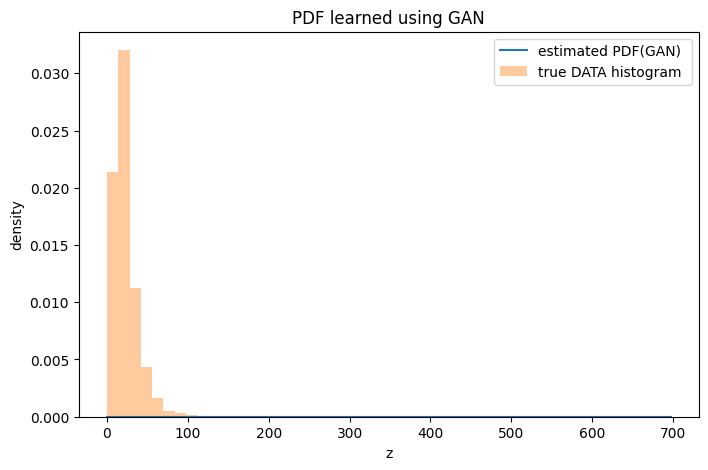

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
kde = gaussian_kde(z_fake.flatten())
z_range = np.linspace(z.min(),z.max(),500)
pdf_estimated =kde(z_range)
plt.figure(figsize=(8,5))
plt.plot(z_range,pdf_estimated,label="estimated PDF(GAN)")
plt.hist(z,bins=50,density=True,alpha=0.4,label="true DATA histogram ")
plt.legend()
plt.xlabel("z")
plt.ylabel("density")
plt.title("PDF learned using GAN")
plt.show()
